# Simple linear Regression
A simple linear regression asuumes a linear relationship between an input variable X and an output variable Y
The value of Y is depended on the value of X, Hence
Y is the dependent variable
X is the independent variable
Mathematically 'linear relationship' can be reresented by 'linear equation' such as

Y=mX+b

Formula to find m and b (using least square method)

$m = \frac {N Σ(xy) − Σx Σy}{NΣ(x^{2}) − (Σx)^{2}}$

$b =  \frac{(Σy − m Σx)}{N}$


If you are curious about the derivation of these formulas,I recommend reading https://nptel.ac.in/content/storage2/courses/122104019/numerical-analysis/Rathish-kumar/least-square/r1.htm 

The basic idea is when we have scatterred data, we try to find a curve that best fits the data, by figuring out the best fit line. Now which line would be the best fit? The line which lies as close to the scattered data points in the most optimum way.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv('weather.csv')

/home/margarita/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
df=df[['MinTemp','MaxTemp']]

In [12]:
df.head()

,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667


Now that we have our dataset, We will now predict the maximum temperature given the minimum temperature.
Lets start by splitting the features and target variable

In [16]:
x=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values.reshape(-1,1)


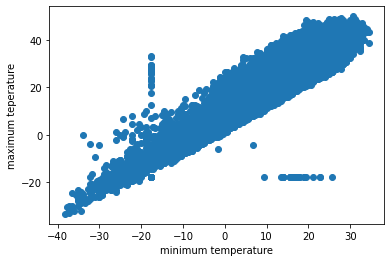

In [18]:
plt.scatter(x,y)
plt.xlabel("minimum temperature")
plt.ylabel("maximum teperature")
plt.show()

In [19]:
#splitting the data to test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30,random_state=0)


In [20]:
#create the model then train the model and then predict
from sklearn.linear_model import LinearRegression
linearregression =LinearRegression()
linearregression.fit(x_train,y_train)
y_predict=linearregression.predict(x_test)

In [21]:
y_predict

array([[33.65481208],
       [30.07941705],
       [26.50402202],
       ...,
       [25.9932513 ],
       [25.9932513 ],
       [25.9932513 ]])

In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 3.1974386977579874
Mean Squared Error: 17.49813185868175
Root Mean Squared Error: 4.183076841116088


rmsd=4.183076841116088
which means that our model is not very accurate but still it would be able to make approximate predictions.